## Intro to data structures

In [34]:
import numpy as np
import pandas as pd

import random
import string

### Series

Series is a one-dimension Pandas structure that comes with an index. We can create a series from ndarray, dict, or scalar.

#### From ndarray

In [379]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [380]:
s

a   -2.578425
b    0.878071
c   -0.974107
d    2.010127
e    0.279641
dtype: float64

In [12]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [20]:
s.cumsum()

a    0.009585
b    0.830617
c    2.033685
d    3.028531
e    2.245762
dtype: float64

In [21]:
pd.Series(np.random.randn(5))

0   -0.303723
1    0.180059
2   -0.052298
3    0.232194
4   -1.154295
dtype: float64

In [37]:
keys = [char for char in string.ascii_lowercase][0:10]

In [38]:
keys

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [39]:
values = np.random.randn(10)

In [44]:
values

array([ 0.41112622, -0.7555878 ,  1.74239573, -0.04858363, -0.80671337,
       -0.36733178, -1.67298346,  0.33362828, -0.65585789, -0.28219984])

#### From dict

In [41]:
d = dict(zip(keys,values))

In [42]:
d

{'a': 0.4111262180287448,
 'b': -0.7555878034763651,
 'c': 1.7423957339003864,
 'd': -0.048583629999347684,
 'e': -0.8067133710859898,
 'f': -0.3673317773971982,
 'g': -1.6729834563628063,
 'h': 0.3336282803700919,
 'i': -0.6558578919301663,
 'j': -0.2821998423422034}

In [43]:
dic = pd.Series(d)

In [45]:
dic

a    0.411126
b   -0.755588
c    1.742396
d   -0.048584
e   -0.806713
f   -0.367332
g   -1.672983
h    0.333628
i   -0.655858
j   -0.282200
dtype: float64

#### From scalar

In [48]:
pd.Series(69, index=d.keys())

a    69
b    69
c    69
d    69
e    69
f    69
g    69
h    69
i    69
j    69
dtype: int64

### Series is ndarray-like

In [49]:
s

a    0.009585
b    0.821032
c    1.203068
d    0.994846
e   -0.782769
dtype: float64

In [50]:
s[0]

0.009584742947242262

In [51]:
s[-1]

-0.7827687334669959

In [52]:
s[4:]

e   -0.782769
dtype: float64

In [56]:
s[s > s.mean()]

b    0.821032
c    1.203068
d    0.994846
dtype: float64

In [57]:
s[[4,3,1]]

e   -0.782769
d    0.994846
b    0.821032
dtype: float64

In [58]:
np.exp(s)

a    1.009631
b    2.272844
c    3.330320
d    2.704307
e    0.457139
dtype: float64

In [60]:
s.dtype

dtype('float64')

In [65]:
s.array

<PandasArray>
[0.009584742947242262,   0.8210318238205085,   1.2030684391552349,
   0.9948457142587217,  -0.7827687334669959]
Length: 5, dtype: float64

In [66]:
s.to_csv()

',0\r\na,0.009584742947242262\r\nb,0.8210318238205085\r\nc,1.2030684391552349\r\nd,0.9948457142587217\r\ne,-0.7827687334669959\r\n'

In [71]:
s.to_numpy()

array([ 0.00958474,  0.82103182,  1.20306844,  0.99484571, -0.78276873])

In [72]:
s.to_string()

'a    0.009585\nb    0.821032\nc    1.203068\nd    0.994846\ne   -0.782769'

### Series is dict-like

In [73]:
s['a']

0.009584742947242262

In [74]:
s['e'] = s['a'] + s['d']

In [75]:
s['e']

1.004430457205964

In [76]:
s

a    0.009585
b    0.821032
c    1.203068
d    0.994846
e    1.004430
dtype: float64

In [77]:
1.004430 in s

False

In [78]:
'a' in s

True

In [79]:
s.get('f')

In [80]:
s.get('f', np.nan)

nan

In [81]:
s

a    0.009585
b    0.821032
c    1.203068
d    0.994846
e    1.004430
dtype: float64

### Vectorized operations and label alignment with Series

In [82]:
s * 3

a    0.028754
b    2.463095
c    3.609205
d    2.984537
e    3.013291
dtype: float64

In [83]:
s - 1

a   -0.990415
b   -0.178968
c    0.203068
d   -0.005154
e    0.004430
dtype: float64

In [85]:
s + 1/s

a    104.342065
b      2.039011
c      2.034276
d      2.000027
e      2.000020
dtype: float64

In [86]:
np.exp(s)

a    1.009631
b    2.272844
c    3.330320
d    2.704307
e    2.730352
dtype: float64

In [89]:
ss = s[1:] + s[:-1]

In [90]:
ss

a         NaN
b    1.642064
c    2.406137
d    1.989691
e         NaN
dtype: float64

In [91]:
ss.dropna()

b    1.642064
c    2.406137
d    1.989691
dtype: float64

### Name attribute

In [142]:
barangay = ['Acacia', 'Baritan', 'Bayan-Bayanan','Catmon', 'Concepcion', 
            'Dampalit', 'Flores', 'Hulong Duhat', 'Ibaba', 'Longos',
            'Maysilo', 'Muzon', 'Niugan', 'Panghulo', 'Potrero', 
            'San Agustin', 'Santulan', 'Tanong', 'Tinajeros', 'Tonsuya',
            'Tugatog']

In [230]:
confirmed_cases = [2, 4, 9, 16, 4, 5, 0, 6, 21, 48, 2, 4, 13, 2, 28, 12,
                   0, 16, 19, 29, 16]

In [231]:
deaths = [0, 0, 2, 4, 0, 0, 0, 0, 2, 7, 1, 1, 1, 0, 2, 0, 0, 3, 5, 3, 1]

In [233]:
recovered = [2, 2, 1, 6, 3, 3, 0, 4, 4, 16, 0, 1, 3, 1, 9, 4, 0, 5, 6,
             5, 10]

In [236]:
case_per_barangay = dict(zip(barangay,confirmed_cases))

In [145]:
case_per_barangay

{'Acacia': 2,
 'Baritan': 4,
 'Bayan-Bayanan': 9,
 'Catmon': 16,
 'Concepcion': 4,
 'Dampalit': 5,
 'Flores': 0,
 'Hulong Duhat': 6,
 'Ibaba': 21,
 'Longos': 48,
 'Maysilo': 2,
 'Muzon': 4,
 'Niugan': 13,
 'Panghulo': 2,
 'Potrero': 28,
 'San Agustin': 12,
 'Santulan': 0,
 'Tanong': 16,
 'Tinajeros': 19,
 'Tonsuya': 29,
 'Tugatog': 16}

In [211]:
cases_series = pd.Series(case_per_barangay, index=barangay, 
                         name='confirmed_cases')

In [212]:
cases_series

Acacia            2
Baritan           4
Bayan-Bayanan     9
Catmon           16
Concepcion        4
Dampalit          5
Flores            0
Hulong Duhat      6
Ibaba            21
Longos           48
Maysilo           2
Muzon             4
Niugan           13
Panghulo          2
Potrero          28
San Agustin      12
Santulan          0
Tanong           16
Tinajeros        19
Tonsuya          29
Tugatog          16
Name: confirmed_cases, dtype: int64

In [148]:
malabon = pd.Series(258, index=['Malabon City'])

In [149]:
malabon

Malabon City    258
dtype: int64

In [153]:
malabon_cases = cases_series.append(malabon)

In [240]:
malabon_cases

Acacia             2
Baritan            4
Bayan-Bayanan      9
Catmon            16
Concepcion         4
Dampalit           5
Flores             0
Hulong Duhat       6
Ibaba             21
Longos            48
Maysilo            2
Muzon              4
Niugan            13
Panghulo           2
Potrero           28
San Agustin       12
Santulan           0
Tanong            16
Tinajeros         19
Tonsuya           29
Tugatog           16
Malabon City     258
dtype: int64

### DataFrame

DataFrame is Pandas' most popular data structure. You can think of it like an Excel spreadsheet. We can create a DataFrame from a dict of Series or dicts, dict of ndarrays/lists, structured or record array, list of dicts, or Series. Like Series, it has an index.

#### From dict of Series or dicts

In [382]:
d = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

In [383]:
df = pd.DataFrame(d)

In [384]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [385]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [386]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'one'])

,two,one
d,4.0,NaN
b,2.0,2.0
a,1.0,1.0


In [387]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [388]:
df.columns

Index(['one', 'two'], dtype='object')

In [391]:
dic = {'confirmed_cases': pd.Series(confirmed_cases, index=barangay),
      'deaths': pd.Series(deaths, index=barangay),
      'recovered': pd.Series(recovered, index=barangay)}

In [392]:
dic

{'confirmed_cases': Acacia            2
 Baritan           4
 Bayan-Bayanan     9
 Catmon           16
 Concepcion        4
 Dampalit          5
 Flores            0
 Hulong Duhat      6
 Ibaba            21
 Longos           48
 Maysilo           2
 Muzon             4
 Niugan           13
 Panghulo          2
 Potrero          28
 San Agustin      12
 Santulan          0
 Tanong           16
 Tinajeros        19
 Tonsuya          29
 Tugatog          16
 dtype: int64,
 'deaths': Acacia           0
 Baritan          0
 Bayan-Bayanan    2
 Catmon           4
 Concepcion       0
 Dampalit         0
 Flores           0
 Hulong Duhat     0
 Ibaba            2
 Longos           7
 Maysilo          1
 Muzon            1
 Niugan           1
 Panghulo         0
 Potrero          2
 San Agustin      0
 Santulan         0
 Tanong           3
 Tinajeros        5
 Tonsuya          3
 Tugatog          1
 dtype: int64,
 'recovered': Acacia            2
 Baritan           2
 Bayan-Bayanan     1
 Cat

In [393]:
dic['recovered']['Tinajeros']

6

In [394]:
df = pd.DataFrame(dic)

In [396]:
df

,confirmed_cases,deaths,recovered
Acacia,2,0,2
Baritan,4,0,2
Bayan-Bayanan,9,2,1
Catmon,16,4,6
Concepcion,4,0,3
Dampalit,5,0,3
Flores,0,0,0
Hulong Duhat,6,0,4
Ibaba,21,2,4
Longos,48,7,16


In [398]:
df['recovered']['Tinajeros']

6

In [400]:
df.loc['Tinajeros']

confirmed_cases    19
deaths              5
recovered           6
Name: Tinajeros, dtype: int64

#### From dict of ndarrays/lists

In [179]:
d = {'a': np.linspace(1,100,5), 'b': np.linspace(1,200,5),
     'c': np.linspace(1,300,5)}

In [180]:
d

{'a': array([  1.  ,  25.75,  50.5 ,  75.25, 100.  ]),
 'b': array([  1.  ,  50.75, 100.5 , 150.25, 200.  ]),
 'c': array([  1.  ,  75.75, 150.5 , 225.25, 300.  ])}

In [181]:
df = pd.DataFrame(d)

In [182]:
df

,a,b,c
0,1.00,1.00,1.00
1,25.75,50.75,75.75
2,50.50,100.50,150.50
3,75.25,150.25,225.25
4,100.00,200.00,300.00


In [401]:
pd.DataFrame(d, index=['first', 'second', 'third', 'fourth', 'fifth'])

,one,two
first,NaN,NaN
second,NaN,NaN
third,NaN,NaN
fourth,NaN,NaN
fifth,NaN,NaN


In [403]:
barangay

['Acacia',
 'Baritan',
 'Bayan-Bayanan',
 'Catmon',
 'Concepcion',
 'Dampalit',
 'Flores',
 'Hulong Duhat',
 'Ibaba',
 'Longos',
 'Maysilo',
 'Muzon',
 'Niugan',
 'Panghulo',
 'Potrero',
 'San Agustin',
 'Santulan',
 'Tanong',
 'Tinajeros',
 'Tonsuya',
 'Tugatog']

In [405]:
confirmed_cases

[2, 4, 9, 16, 4, 5, 0, 6, 21, 48, 2, 4, 13, 2, 28, 12, 0, 16, 19, 29, 16]

In [407]:
deaths

[0, 0, 2, 4, 0, 0, 0, 0, 2, 7, 1, 1, 1, 0, 2, 0, 0, 3, 5, 3, 1]

In [409]:
recovered

[2, 2, 1, 6, 3, 3, 0, 4, 4, 16, 0, 1, 3, 1, 9, 4, 0, 5, 6, 5, 10]

In [415]:
dic = {'confirmed_cases': confirmed_cases, 'deaths': deaths, 'recovered': recovered}

In [418]:
print(dic)

{'confirmed_cases': [2, 4, 9, 16, 4, 5, 0, 6, 21, 48, 2, 4, 13, 2, 28, 12, 0, 16, 19, 29, 16], 'deaths': [0, 0, 2, 4, 0, 0, 0, 0, 2, 7, 1, 1, 1, 0, 2, 0, 0, 3, 5, 3, 1], 'recovered': [2, 2, 1, 6, 3, 3, 0, 4, 4, 16, 0, 1, 3, 1, 9, 4, 0, 5, 6, 5, 10]}


In [420]:
malabon_df = pd.DataFrame(dic, index=barangay)

In [421]:
malabon_df

,confirmed_cases,deaths,recovered
Acacia,2,0,2
Baritan,4,0,2
Bayan-Bayanan,9,2,1
Catmon,16,4,6
Concepcion,4,0,3
Dampalit,5,0,3
Flores,0,0,0
Hulong Duhat,6,0,4
Ibaba,21,2,4
Longos,48,7,16


#### From structured or record array

In [191]:
data = np.zeros((2,), dtype=[('A', 'i4'), ('B', 'f4'), ('C', 'a10')])

In [192]:
data

array([(0, 0., b''), (0, 0., b'')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [193]:
data[:] = [(1, 2., 'Hello'), (2, 3., "World")]

In [194]:
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [195]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


#### From a list of dicts

In [205]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [206]:
data2

[{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [207]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [208]:
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [210]:
pd.DataFrame(data2, index=['first', 'second'], columns=['b', 'a'])

,b,a
first,2,1
second,10,5


#### From a Series

In [214]:
pd.DataFrame(cases_series)

,confirmed_cases
Acacia,2
Baritan,4
Bayan-Bayanan,9
Catmon,16
Concepcion,4
Dampalit,5
Flores,0
Hulong Duhat,6
Ibaba,21
Longos,48


#### Column selection, addition, deletion

In [249]:
df

,confirmed_cases,deaths,recovered
Acacia,2,0,2
Baritan,4,0,2
Bayan-Bayanan,9,2,1
Catmon,16,4,6
Concepcion,4,0,3
Dampalit,5,0,3
Flores,0,0,0
Hulong Duhat,6,0,4
Ibaba,21,2,4
Longos,48,7,16


In [250]:
df['recovered']

Acacia            2
Baritan           2
Bayan-Bayanan     1
Catmon            6
Concepcion        3
Dampalit          3
Flores            0
Hulong Duhat      4
Ibaba             4
Longos           16
Maysilo           0
Muzon             1
Niugan            3
Panghulo          1
Potrero           9
San Agustin       4
Santulan          0
Tanong            5
Tinajeros         6
Tonsuya           5
Tugatog          10
Name: recovered, dtype: int64

In [252]:
df['recovered']['Tinajeros']

6

In [255]:
df['hotspot'] = df['confirmed_cases'] > df['confirmed_cases'].mean()

In [256]:
df

,confirmed_cases,deaths,recovered,hotspot
Acacia,2,0,2,False
Baritan,4,0,2,False
Bayan-Bayanan,9,2,1,False
Catmon,16,4,6,True
Concepcion,4,0,3,False
Dampalit,5,0,3,False
Flores,0,0,0,False
Hulong Duhat,6,0,4,False
Ibaba,21,2,4,True
Longos,48,7,16,True


In [257]:
hotspot = df.pop('hotspot')

In [258]:
df

,confirmed_cases,deaths,recovered
Acacia,2,0,2
Baritan,4,0,2
Bayan-Bayanan,9,2,1
Catmon,16,4,6
Concepcion,4,0,3
Dampalit,5,0,3
Flores,0,0,0
Hulong Duhat,6,0,4
Ibaba,21,2,4
Longos,48,7,16


In [259]:
hotspot

Acacia           False
Baritan          False
Bayan-Bayanan    False
Catmon            True
Concepcion       False
Dampalit         False
Flores           False
Hulong Duhat     False
Ibaba             True
Longos            True
Maysilo          False
Muzon            False
Niugan            True
Panghulo         False
Potrero           True
San Agustin      False
Santulan         False
Tanong            True
Tinajeros         True
Tonsuya           True
Tugatog           True
Name: hotspot, dtype: bool

In [260]:
df['scalar'] = 69

In [261]:
df

,confirmed_cases,deaths,recovered,scalar
Acacia,2,0,2,69
Baritan,4,0,2,69
Bayan-Bayanan,9,2,1,69
Catmon,16,4,6,69
Concepcion,4,0,3,69
Dampalit,5,0,3,69
Flores,0,0,0,69
Hulong Duhat,6,0,4,69
Ibaba,21,2,4,69
Longos,48,7,16,69


In [262]:
scalar = df.pop('scalar')

In [263]:
df

,confirmed_cases,deaths,recovered
Acacia,2,0,2
Baritan,4,0,2
Bayan-Bayanan,9,2,1
Catmon,16,4,6
Concepcion,4,0,3
Dampalit,5,0,3
Flores,0,0,0
Hulong Duhat,6,0,4
Ibaba,21,2,4
Longos,48,7,16


In [271]:
scalar

Acacia           69
Baritan          69
Bayan-Bayanan    69
Catmon           69
Concepcion       69
Dampalit         69
Flores           69
Hulong Duhat     69
Ibaba            69
Longos           69
Maysilo          69
Muzon            69
Niugan           69
Panghulo         69
Potrero          69
San Agustin      69
Santulan         69
Tanong           69
Tinajeros        69
Tonsuya          69
Tugatog          69
Name: scalar, dtype: int64

In [273]:
df.insert(3, 'active_cases', active_cases)

In [275]:
df

,confirmed_cases,deaths,recovered,active_cases
Acacia,2,0,2,0
Baritan,4,0,2,2
Bayan-Bayanan,9,2,1,6
Catmon,16,4,6,6
Concepcion,4,0,3,1
Dampalit,5,0,3,2
Flores,0,0,0,0
Hulong Duhat,6,0,4,2
Ibaba,21,2,4,15
Longos,48,7,16,25


In [276]:
new_cases = [0, 0, 2, 1, 0, 0, 0, 0, 2, 5, 0, 0, 1, 0, 1, 2, 0, 2, 1, 5, 0]

In [277]:
df.insert(4, 'new_cases', new_cases)

In [278]:
df

,confirmed_cases,deaths,recovered,active_cases,new_cases
Acacia,2,0,2,0,0
Baritan,4,0,2,2,0
Bayan-Bayanan,9,2,1,6,2
Catmon,16,4,6,6,1
Concepcion,4,0,3,1,0
Dampalit,5,0,3,2,0
Flores,0,0,0,0,0
Hulong Duhat,6,0,4,2,0
Ibaba,21,2,4,15,2
Longos,48,7,16,25,5


#### Assigning new columns in method chains

In [296]:
iris_df = pd.read_csv('iris.data', 
                      names=['SepalLength', 'SepalWidth', 'PetalLength',
                               'PetalWidth', 'Name'])

In [297]:
iris_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [298]:
iris_df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [299]:
iris_df.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [300]:
df

,confirmed_cases,deaths,recovered,active_cases,new_cases
Acacia,2,0,2,0,0
Baritan,4,0,2,2,0
Bayan-Bayanan,9,2,1,6,2
Catmon,16,4,6,6,1
Concepcion,4,0,3,1,0
Dampalit,5,0,3,2,0
Flores,0,0,0,0,0
Hulong Duhat,6,0,4,2,0
Ibaba,21,2,4,15,2
Longos,48,7,16,25,5


In [301]:
df.head()

,confirmed_cases,deaths,recovered,active_cases,new_cases
Acacia,2,0,2,0,0
Baritan,4,0,2,2,0
Bayan-Bayanan,9,2,1,6,2
Catmon,16,4,6,6,1
Concepcion,4,0,3,1,0


In [302]:
df.tail()

,confirmed_cases,deaths,recovered,active_cases,new_cases
Santulan,0,0,0,0,0
Tanong,16,3,5,8,2
Tinajeros,19,5,6,8,1
Tonsuya,29,3,5,21,5
Tugatog,16,1,10,5,0


In [307]:
(iris_df.assign(sepal_ratio=iris_df['SepalWidth']
                / iris_df['SepalLength']).head())

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [309]:
iris_df.assign(sepal_ratio_b= lambda x: 
            (x['SepalWidth'] / x['SepalLength'])).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio_b
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [310]:
iris_df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


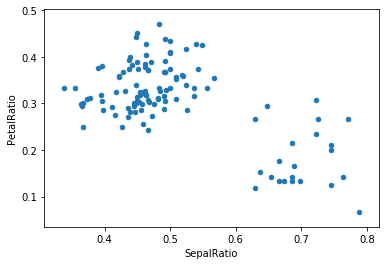

In [322]:
iris_df.query('SepalLength > 5').assign(SepalRatio= lambda x: x.SepalWidth / x.SepalLength, 
                                        PetalRatio= lambda x: x.PetalWidth / x.PetalLength).plot(kind='scatter', x='SepalRatio', y='PetalRatio')

In [323]:
df

,confirmed_cases,deaths,recovered,active_cases,new_cases
Acacia,2,0,2,0,0
Baritan,4,0,2,2,0
Bayan-Bayanan,9,2,1,6,2
Catmon,16,4,6,6,1
Concepcion,4,0,3,1,0
Dampalit,5,0,3,2,0
Flores,0,0,0,0,0
Hulong Duhat,6,0,4,2,0
Ibaba,21,2,4,15,2
Longos,48,7,16,25,5


In [324]:
del df['active_cases']

In [325]:
df

,confirmed_cases,deaths,recovered,new_cases
Acacia,2,0,2,0
Baritan,4,0,2,0
Bayan-Bayanan,9,2,1,2
Catmon,16,4,6,1
Concepcion,4,0,3,0
Dampalit,5,0,3,0
Flores,0,0,0,0
Hulong Duhat,6,0,4,0
Ibaba,21,2,4,2
Longos,48,7,16,5


In [326]:
del df['new_cases']

In [327]:
df

,confirmed_cases,deaths,recovered
Acacia,2,0,2
Baritan,4,0,2
Bayan-Bayanan,9,2,1
Catmon,16,4,6
Concepcion,4,0,3
Dampalit,5,0,3
Flores,0,0,0
Hulong Duhat,6,0,4
Ibaba,21,2,4
Longos,48,7,16


In [330]:
df = df.assign(active_cases= lambda x: x.confirmed_cases - x.deaths - x.recovered)

In [333]:
df

,confirmed_cases,deaths,recovered,active_cases
Acacia,2,0,2,0
Baritan,4,0,2,2
Bayan-Bayanan,9,2,1,6
Catmon,16,4,6,6
Concepcion,4,0,3,1
Dampalit,5,0,3,2
Flores,0,0,0,0
Hulong Duhat,6,0,4,2
Ibaba,21,2,4,15
Longos,48,7,16,25


In [334]:
dfa = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

In [335]:
dfa

,A,B
0,1,4
1,2,5
2,3,6


In [336]:
dfa.assign(C=lambda x: x['A'] + x['B'],
          D=lambda x: x['A'] + x['C'])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


#### Indexing / selection

In [337]:
df['deaths']

Acacia           0
Baritan          0
Bayan-Bayanan    2
Catmon           4
Concepcion       0
Dampalit         0
Flores           0
Hulong Duhat     0
Ibaba            2
Longos           7
Maysilo          1
Muzon            1
Niugan           1
Panghulo         0
Potrero          2
San Agustin      0
Santulan         0
Tanong           3
Tinajeros        5
Tonsuya          3
Tugatog          1
Name: deaths, dtype: int64

In [338]:
df.loc['Tinajeros']

confirmed_cases    19
deaths              5
recovered           6
active_cases        8
Name: Tinajeros, dtype: int64

In [339]:
df.iloc[5]

confirmed_cases    5
deaths             0
recovered          3
active_cases       2
Name: Dampalit, dtype: int64

In [340]:
df[5:10]

,confirmed_cases,deaths,recovered,active_cases
Dampalit,5,0,3,2
Flores,0,0,0,0
Hulong Duhat,6,0,4,2
Ibaba,21,2,4,15
Longos,48,7,16,25


In [341]:
df[active_cases > 10]

,confirmed_cases,deaths,recovered,active_cases
Ibaba,21,2,4,15
Longos,48,7,16,25
Potrero,28,2,9,17
Tonsuya,29,3,5,21


#### Data alignment and arithmetic

In [345]:
np.random.randn(10, 4)

array([[ 1.87148449,  1.5803682 ,  0.12309316,  0.14535757],
       [-1.62714304,  0.53407098, -0.49982146,  0.39208811],
       [-0.85470521,  1.98782602,  1.24885481,  1.64349377],
       [-1.40568067,  0.38783713,  0.54841147, -0.49632516],
       [-0.94307429,  0.3119877 ,  0.08833503,  0.36285388],
       [ 0.97872322,  0.08800465, -0.6961786 , -0.59453535],
       [-0.40506227,  1.97539302,  1.16701295,  3.89623083],
       [ 0.32232991,  0.97462522, -0.70878191,  1.38825559],
       [ 1.87498401,  1.35614319, -0.27850444, -0.70826183],
       [-1.55669343,  0.02732031,  0.87755249,  0.26265545]])

In [347]:
np.random.randn(7, 3)

array([[ 0.5326227 , -0.56478195, -0.36541506],
       [ 0.56892462, -0.7314639 , -0.21723899],
       [-0.26445028,  0.00913757,  1.49177459],
       [ 0.56481949, -0.69517319,  0.22008144],
       [-1.27680607,  0.27632955, -0.64964085],
       [-1.37814126,  2.13030515,  0.17119403],
       [ 0.24233452,  1.81956441,  1.09548852]])

In [349]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])

In [350]:
df

,A,B,C,D
0,-0.534894,-0.008952,-0.151955,0.380504
1,1.071637,1.179449,1.073480,1.668865
2,-1.249077,1.108112,-0.856167,0.212670
3,-1.235350,0.927537,-0.598069,-0.587812
4,-0.101810,0.139640,-0.627711,0.277876
5,0.098655,-0.811241,-0.800694,-1.037601
6,1.098634,0.261188,-0.768284,1.668471
7,0.569075,1.128104,1.093315,0.162738
8,-0.039935,-0.986436,-0.203076,-1.327146
9,1.128078,-0.455082,1.441144,0.255503


In [351]:
df2 = pd.DataFrame(np.random.rand(7, 3), columns=['A', 'B', 'C'])

In [352]:
df2

,A,B,C
0,0.708372,0.165594,0.232377
1,0.172621,0.863842,0.869478
2,0.597395,0.750408,0.607470
3,0.266142,0.155149,0.378934
4,0.926794,0.025458,0.646792
5,0.793496,0.774889,0.468448
6,0.107262,0.578528,0.121165


In [353]:
df + df2

,A,B,C,D
0,0.173478,0.156642,0.080422,NaN
1,1.244259,2.043290,1.942958,NaN
2,-0.651682,1.858519,-0.248697,NaN
3,-0.969209,1.082686,-0.219135,NaN
4,0.824983,0.165099,0.019081,NaN
5,0.892151,-0.036351,-0.332246,NaN
6,1.205896,0.839716,-0.647119,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [354]:
df.iloc[0]

A   -0.534894
B   -0.008952
C   -0.151955
D    0.380504
Name: 0, dtype: float64

In [355]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,1.606532,1.188401,1.225435,1.288361
2,-0.714183,1.117064,-0.704213,-0.167835
3,-0.700456,0.936489,-0.446114,-0.968317
4,0.433084,0.148592,-0.475756,-0.102629
5,0.633549,-0.802289,-0.648739,-1.418106
6,1.633528,0.270140,-0.616329,1.287966
7,1.103969,1.137055,1.245269,-0.217767
8,0.494959,-0.977484,-0.051121,-1.707650
9,1.662973,-0.446130,1.593099,-0.125002


In [356]:
df

,A,B,C,D
0,-0.534894,-0.008952,-0.151955,0.380504
1,1.071637,1.179449,1.073480,1.668865
2,-1.249077,1.108112,-0.856167,0.212670
3,-1.235350,0.927537,-0.598069,-0.587812
4,-0.101810,0.139640,-0.627711,0.277876
5,0.098655,-0.811241,-0.800694,-1.037601
6,1.098634,0.261188,-0.768284,1.668471
7,0.569075,1.128104,1.093315,0.162738
8,-0.039935,-0.986436,-0.203076,-1.327146
9,1.128078,-0.455082,1.441144,0.255503


In [359]:
index = pd.date_range('1/1/2000', periods=8)

In [360]:
index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08'],
              dtype='datetime64[ns]', freq='D')

In [362]:
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=list('ABC'))

In [363]:
df

,A,B,C
2000-01-01,1.040848,-1.365323,0.410110
2000-01-02,0.960262,-0.920419,-1.239886
2000-01-03,0.381671,1.534959,-1.212469
2000-01-04,-0.727796,-0.062011,-0.879498
2000-01-05,1.211931,1.070526,1.109388
2000-01-06,-1.320473,0.574183,-0.143024
2000-01-07,0.976742,0.897398,0.345278
2000-01-08,0.691938,0.883369,-0.021556


In [364]:
df - df['A']

,2000-01-01 00:00:00,2000-01-02 00:00:00,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00,2000-01-08 00:00:00,A,B,C
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [365]:
df

,A,B,C
2000-01-01,1.040848,-1.365323,0.410110
2000-01-02,0.960262,-0.920419,-1.239886
2000-01-03,0.381671,1.534959,-1.212469
2000-01-04,-0.727796,-0.062011,-0.879498
2000-01-05,1.211931,1.070526,1.109388
2000-01-06,-1.320473,0.574183,-0.143024
2000-01-07,0.976742,0.897398,0.345278
2000-01-08,0.691938,0.883369,-0.021556


#### Transposing

In [366]:
df['A']

2000-01-01    1.040848
2000-01-02    0.960262
2000-01-03    0.381671
2000-01-04   -0.727796
2000-01-05    1.211931
2000-01-06   -1.320473
2000-01-07    0.976742
2000-01-08    0.691938
Freq: D, Name: A, dtype: float64

In [368]:
df[0:5].T

,2000-01-01,2000-01-02,2000-01-03,2000-01-04,2000-01-05
A,1.040848,0.960262,0.381671,-0.727796,1.211931
B,-1.365323,-0.920419,1.534959,-0.062011,1.070526
C,0.410110,-1.239886,-1.212469,-0.879498,1.109388


#### DataFrame interoperability with NumPy functions

In [369]:
np.exp(df)

,A,B,C
2000-01-01,2.831618,0.255298,1.506983
2000-01-02,2.612380,0.398352,0.289417
2000-01-03,1.464731,4.641137,0.297462
2000-01-04,0.482972,0.939872,0.414991
2000-01-05,3.359965,2.916915,3.032502
2000-01-06,0.267009,1.775680,0.866733
2000-01-07,2.655791,2.453213,1.412382
2000-01-08,1.997584,2.419035,0.978675


In [370]:
np.asarray(df)

array([[ 1.04084831, -1.36532342,  0.41010971],
       [ 0.96026151, -0.92041884, -1.23988574],
       [ 0.38167135,  1.53495928, -1.21246891],
       [-0.72779629, -0.0620113 , -0.87949826],
       [ 1.21193053,  1.07052643,  1.10938786],
       [-1.32047349,  0.57418327, -0.14302402],
       [ 0.97674244,  0.89739841,  0.34527754],
       [ 0.69193848,  0.88336867, -0.0215557 ]])

#### Console display

In [375]:
url = 'https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/baseball.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [376]:
df.head()

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    int64  
 1   player  100 non-null    object 
 2   year    100 non-null    int64  
 3   stint   100 non-null    int64  
 4   team    100 non-null    object 
 5   lg      100 non-null    object 
 6   g       100 non-null    int64  
 7   ab      100 non-null    int64  
 8   r       100 non-null    int64  
 9   h       100 non-null    int64  
 10  X2b     100 non-null    int64  
 11  X3b     100 non-null    int64  
 12  hr      100 non-null    int64  
 13  rbi     100 non-null    float64
 14  sb      100 non-null    float64
 15  cs      100 non-null    float64
 16  bb      100 non-null    int64  
 17  so      100 non-null    float64
 18  ibb     100 non-null    float64
 19  hbp     100 non-null    float64
 20  sh      100 non-null    float64
 21  sf      100 non-null    float64
 22  gid

In [378]:
df.head().to_string()

'      id     player  year  stint team  lg   g  ab  r   h  X2b  X3b  hr  rbi   sb   cs  bb   so  ibb  hbp   sh   sf  gidp\n0  88641  womacto01  2006      2  CHN  NL  19  50  6  14    1    0   1  2.0  1.0  1.0   4  4.0  0.0  0.0  3.0  0.0   0.0\n1  88643  schilcu01  2006      1  BOS  AL  31   2  0   1    0    0   0  0.0  0.0  0.0   0  1.0  0.0  0.0  0.0  0.0   0.0\n2  88645  myersmi01  2006      1  NYA  AL  62   0  0   0    0    0   0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0\n3  88649  helliri01  2006      1  MIL  NL  20   3  0   0    0    0   0  0.0  0.0  0.0   0  2.0  0.0  0.0  0.0  0.0   0.0\n4  88650  johnsra05  2006      1  NYA  AL  33   6  0   1    0    0   0  0.0  0.0  0.0   0  4.0  0.0  0.0  0.0  0.0   0.0'